In [102]:
# Problem 1: determining max. excavation depth
# 

In [229]:
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from random import randint
from sklearn import preprocessing
from sklearn import utils
from sklearn.utils import shuffle
from sklearn import svm
import os.path
import numpy as np
from sklearn.svm import SVR
import pandas as pd
import scikeras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Loading dataset

In [230]:
# loading dataset for problem 1
# Update relevant path to X1 and Y1 files
X2 = pd.read_excel('X1.xlsx')
Y = pd.read_excel('Y1.xlsx')
X2=X2.drop(Y.columns[0], axis=1)
Y=Y.drop(Y.columns[0], axis=1)
Y=np.array(Y)
Y=np.ravel(Y)
X2=np.array(X2)

# Support Vector Regression

In [231]:
# Normalization
scaler = MinMaxScaler()
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
# Support vector machine regression
svr = SVR(kernel="rbf", C=100, gamma="auto", degree=3, epsilon=0.1)
svr.fit(X_trainT, y_train)
# Predict on new data
y_rf = svr.predict(X_testT)
svrscore=svr.score(X_testT, y_test, sample_weight=None)
svrscore # coefficient of determination

0.9365894572563243

In [232]:
RMSE_SVR=(mean_squared_error(y_test, y_rf))**0.5
RMSE_SVR

0.4376267563874292

# Support Vector Classification

In [233]:
# Normalization
scaler = MinMaxScaler()
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
# Support vector classification
svc = svm.SVC()
svc.fit(X_trainT, y_train)
# Predict on new data
y_svc = svc.predict(X_testT)
svcscore=svc.score(X_testT, y_test, sample_weight=None)
svcscore # coefficient of determination

0.7625

In [234]:
RMSE_SVC=(mean_squared_error(y_test, y_svc))**0.5
RMSE_SVC

0.5244044240850758

# Random Forest Classification

In [235]:
scaler = MinMaxScaler()
# test-train split
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.2, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
class_rf = RandomForestClassifier(max_depth=80, random_state=123)
class_rf.fit(X_trainT, y_train)
# Predict on new data
y_rf = class_rf.predict(X_testT)
forestscoreC=class_rf.score(X_testT, y_test, sample_weight=None)
forestscoreC # coefficient of determination

0.725

In [236]:
# RMSE
RMSE_RFC=(mean_squared_error(y_test, y_rf))**0.5
RMSE_RFC

0.5755432216610669

Text(0, 0.5, 'Predicted non-convergence stage #')

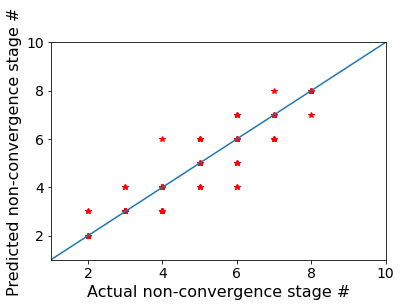

In [237]:
# plot of prediction vs. actual results
y_t=y_test
nn=10 # plot boundary
xx=np.linspace(0, nn, len(y_t))
yy=xx
plt.plot(y_t, y_rf, 'r*')
plt.plot(xx, yy)
plt.axis([1, nn, 1, nn])
plt.xlabel("Actual non-convergence stage #", fontsize=16)
plt.ylabel("Predicted non-convergence stage #", fontsize=16)

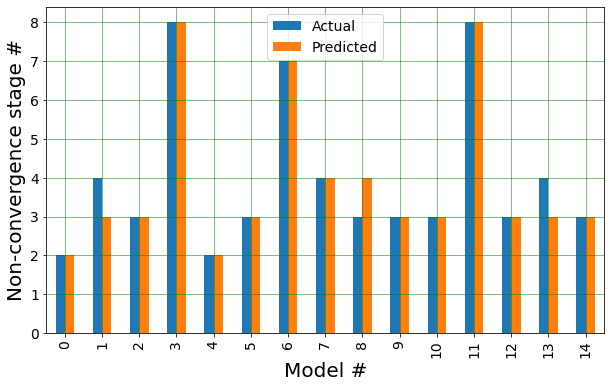

In [238]:
# plot in form of bar chart
predictions = y_rf
y_test=np.array(y_test)
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_temp2 = df_temp2.head(15)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Model #', fontsize=20)
plt.ylabel('Non-convergence stage #', fontsize=20)
plt.show()

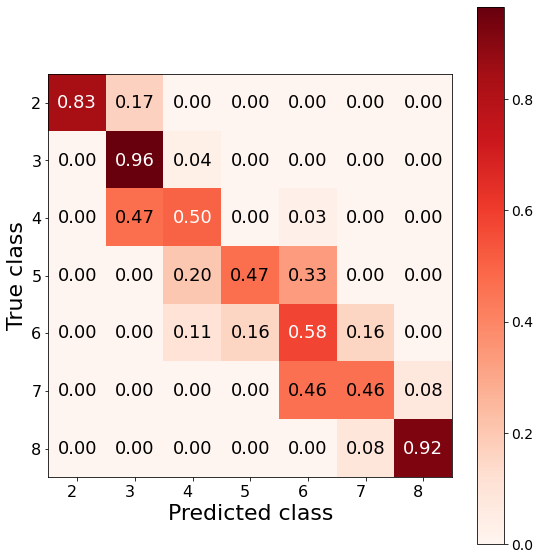

In [240]:
# plot of confusion matrix 
cm = confusion_matrix(y_test, y_rf)
classes = unique_labels(y_test, y_rf)
# normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Reds)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm_normalized.shape[1]),
       yticks=np.arange(cm_normalized.shape[0]),
       xticklabels=classes, yticklabels=classes,
       ylabel='True class',
       xlabel='Predicted class')
# set the font size of the tick labels and title
ax.tick_params(axis='both', which='major', labelsize=16)

# set the font size of the x and y labels
ax.set_xlabel(ax.get_xlabel(), fontsize=22)
ax.set_ylabel(ax.get_ylabel(), fontsize=22)

# rotate the xtick labels for better visibility
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# loop over the data and add the annotations
fmt = '.2f'
thresh = cm_normalized.max() / 2.
for i in range(cm_normalized.shape[0]):
    for j in range(cm_normalized.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], fmt),
                ha="center", va="center", fontsize=18,
                color="white" if cm_normalized[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

# Random forest resgression

In [183]:
# Normalization- found unuseful for random forest regression
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)
X_trainT=scaler.fit_transform(X_train)
X_testT=scaler.fit_transform(X_test)
X_trainT=scaler.inverse_transform(X_trainT)
X_testT=scaler.inverse_transform(X_testT)
# Random forest model
regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
regr_rf.fit(X_trainT, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_testT)
forestscoreR=regr_rf.score(X_testT, y_test, sample_weight=None)
forestscoreR

0.9492664688238934

In [184]:
# RMSE
RMSE_RFR=(mean_squared_error(y_test, y_rf))**0.5
RMSE_RFR

0.40804871032757845

Text(0, 0.5, 'Predicted non-convergence stage #')

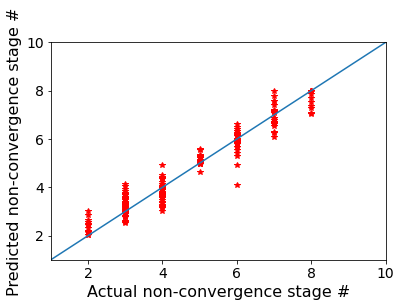

In [185]:
# prediction vs. actual plot
y_t=y_test
nn=10 # plot boundary
xx=np.linspace(0, nn, len(y_t))
yy=xx
plt.plot(y_t, y_rf, 'r*')
plt.plot(xx, yy)
plt.axis([1, nn, 1, nn])
plt.xlabel("Actual non-convergence stage #", fontsize=16)
plt.ylabel("Predicted non-convergence stage #", fontsize=16)

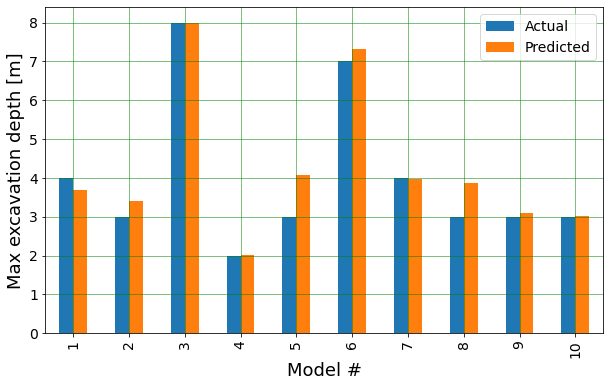

In [225]:
# plot in form of bar chart
predictions = y_rf
y_test=np.array(y_test)
df_temp2 = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
df_temp2 = df_temp2[1:11]
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xlabel('Model #', fontsize=18)
plt.ylabel('Max excavation depth [m]', fontsize=18)
plt.show()

# KNeighbors Regression

In [187]:
neigh = KNeighborsRegressor(n_neighbors=5) # neighbors=5 found to be optimal
KNR=neigh.fit(X_trainT, y_train)
y_knn = KNR.predict(X_testT)
RMSE_KNR=(mean_squared_error(y_test, y_knn))**0.5
print(RMSE_KNR)

1.8829498134575973


# KNeighbors Classification

In [188]:
neigh = KNeighborsClassifier(n_neighbors=6)
KNC=neigh.fit(X_trainT, y_train)
y_knc = KNC.predict(X_testT)
RMSE_KNC=(mean_squared_error(y_test, y_knc))**0.5
print(RMSE_KNC)

2.344319375284292


# Plot of score vs. number of samples

In [244]:
nn=55
initial=50
delta=10
print("max. samples: ", initial+delta*nn)
ForestscoreC=np.zeros(nn)
ForestscoreR=np.zeros(nn)
ForestC_RMSE=np.zeros(nn)
ForestR_RMSE=np.zeros(nn)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

max. samples:  600


In [245]:

ll=[]

for i in range(nn):
    j=int(initial+delta*i)
    ll.append(j)
    X_train, y_train = shuffle(X_train, y_train)
    X_train1=X_train[0:int(0.8*j),:]
    y_train1=y_train[0:int(0.8*j)]
    X_test1=X_test[0:int(0.2*j),:]
    y_test1=y_test[0:int(0.2*j)]
    # X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
    
    # Random forest model
    regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
    regr_rf.fit(X_train1, y_train1)
    # Predict on new data
    y_rf = regr_rf.predict(X_test1)
    ForestscoreR[i]=regr_rf.score(X_test1, y_test1, sample_weight=None)
    ForestR_RMSE[i]=(mean_squared_error(y_test1, y_rf))**0.5

In [246]:
ll=[]

for i in range(nn):
    j=int(initial+delta*i)
    ll.append(j)
    # X_train, y_train = shuffle(X_train, y_train)
    X_train1=X_train[0:int(0.8*j),:]
    y_train1=y_train[0:int(0.8*j)]
    X_test1=X_test[0:int(0.2*j),:]
    y_test1=y_test[0:int(0.2*j)]
    # X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, random_state=42)
    
    # Random forest model
    class_rf = RandomForestClassifier(max_depth=80, random_state=123)
    class_rf.fit(X_train1, y_train1)
    # Predict on new data
    y_rf = class_rf.predict(X_test1)
    ForestscoreC[i]=class_rf.score(X_test1, y_test1, sample_weight=None)
    ForestC_RMSE[i]=(mean_squared_error(y_test1, y_rf))**0.5

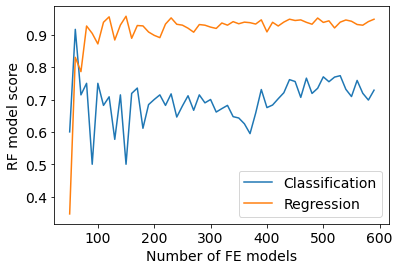

In [247]:
plt.plot(ll, ForestscoreC,label='Classification')
plt.plot(ll, ForestscoreR,label='Regression')
plt.legend(loc='lower right')
plt.xlabel('Number of FE models')
plt.ylabel('RF model score')
plt.rcParams.update({'font.size': 14})
plt.show()

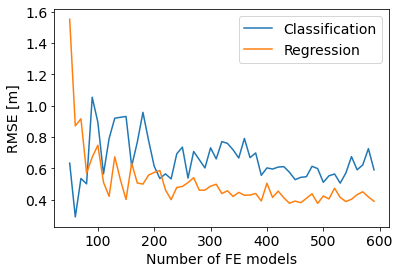

In [249]:
# plot of number of models vs. RMSE
plt.plot(ll, ForestC_RMSE, label='Classification')
plt.plot(ll, ForestR_RMSE, label='Regression')
plt.legend(loc='upper right')
plt.xlabel('Number of FE models')
plt.ylabel('RMSE [m]')
plt.rcParams.update({'font.size': 14})
plt.show()

## Feature importance

In [215]:
# ML feature importance
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y, test_size=0.3, random_state=42)
# Random forest model
regr_rf = RandomForestRegressor(max_depth=80, random_state=0)
regr_rf.fit(X_train2, y_train2)
# Predict on new data
y_rf = regr_rf.predict(X_test2)
forestscore=regr_rf.score(X_test2, y_test2, sample_weight=None)
forestscore


0.9473962515671369

Text(0, 0.5, 'Feature importance')

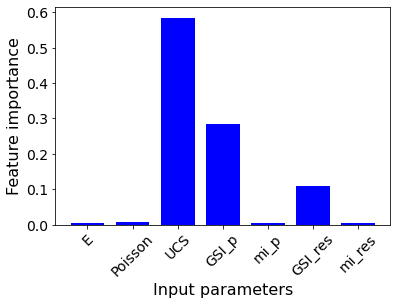

In [216]:
# feature importance plot
fi=regr_rf.feature_importances_
data = {'E':fi[0], 'Poisson':fi[1], 'UCS':fi[2],
        'GSI_p':fi[3], 'mi_p':fi[4], 'GSI_res':fi[5], 'mi_res':fi[6]}
models = list(data.keys())
values = list(data.values())
plt.bar(models, values, color ='Blue', width = 0.75)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Input parameters", fontsize=16)
plt.ylabel("Feature importance", fontsize=16)

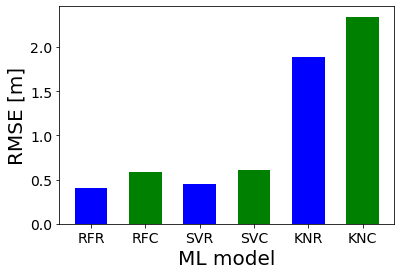

In [217]:
# Model Comparison plot
data = {'RFR':RMSE_RFR, 'RFC':RMSE_RFC, 'SVR':RMSE_SVR, 'SVC':RMSE_SVC,
       'KNR':RMSE_KNR, 'KNC':RMSE_KNC}
models = list(data.keys())
values = list(data.values())
c=['Blue', 'Green', 'Blue', 'Green', 'Blue', 'Green']
plt.bar(models, values, color =c, width = 0.6)
plt.xlabel("ML model", fontsize=20)
plt.ylabel("RMSE [m]", fontsize=20)
# plt.title("ML model performance", fontsize=16)

plt.show()

# Executio of surrogate model for investigating narrow range data

In [218]:
# Random forest Regression
X_train, X_test, y_train, y_test = train_test_split(X2, Y, test_size=0.3, random_state=42)
regr_rf = RandomForestRegressor(max_depth=80, random_state=123)
regr_rf.fit(X_train, y_train)
# Predict on new data
y_rf = regr_rf.predict(X_test)
forestscoreR=regr_rf.score(X_test, y_test, sample_weight=None)
forestscoreR

0.9512425689936997

In [220]:
# Loop for creating 2 datasets with narrow range of data
n=10000 # number of iterations
E2=[]
Poisson2=0.25
UCS2=[]
UCS3=[]
GSI_p2=[]
GSI_p3=[]
mi_p2=9
GSI_res2=5
mi_res2=5
Xm2=[]
Xm3=[]

for i in range(n):
    mu, sigma = 600, 0 # mean and standard deviation
    Em = np.random.normal(mu, sigma)
    mu, sigma = 25,0
    UCS_mean=15
    UCS_range=10
    UCSm2=UCS_mean-0.5*UCS_range+UCS_range*np.random.random_sample()
    UCS_mean=25
    UCS_range=10
    UCSm3=UCS_mean-0.5*UCS_range+UCS_range*np.random.random_sample()
    GSI_mean=15
    GSI_range=10
    GSI_pm2=GSI_mean-0.5*GSI_range+GSI_range*np.random.random_sample()
    GSI_mean=20
    GSI_range=10
    GSI_pm3=GSI_mean-0.5*GSI_range+GSI_range*np.random.random_sample()
    X2=np.array([Em, Poisson2, UCSm2, GSI_pm2, mi_p2, GSI_res2, mi_res2])
    X3=np.array([Em, Poisson2, UCSm3, GSI_pm3, mi_p2, GSI_res2, mi_res2])
    Xm2.append(X2)
    Xm3.append(X3)
    
depth2=regr_rf.predict(Xm2)
depth3=regr_rf.predict(Xm3)

3.020884

In [221]:
distY2=np.round(depth2)
distY2=pd.DataFrame(distY2, columns = ['depth'])
distY2=distY2.groupby(['depth'])['depth'].count()
distY2=distY2.sort_index()
distY3=np.round(depth3)
distY3=pd.DataFrame(distY3, columns = ['depth'])
distY3=distY3.groupby(['depth'])['depth'].count()
distY3=distY3.sort_index()

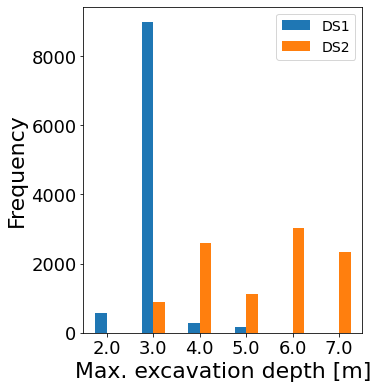

In [222]:
# plot of distribution of max. depth for narrow range of data
df_temp2 = pd.DataFrame({'DS1': distY2, 'DS2': distY3})
df_temp2 = df_temp2.head(10)
df_temp2.plot(kind='bar',figsize=(5,6))
plt.xticks(fontsize=18, rotation=0)
plt.yticks(fontsize=18)
plt.xlabel('Max. excavation depth [m]', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.show()